<a href="https://colab.research.google.com/github/PortugalJip2022/Portugal2022/blob/main/%E5%85%B1%E6%9C%89%E4%BC%9A%E3%83%87%E3%83%A2%E7%94%A8_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


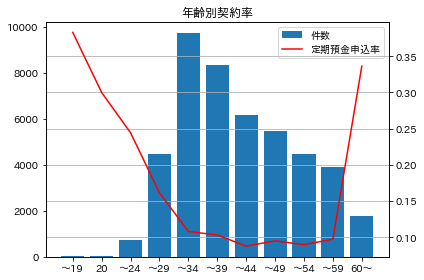

     年齢    件数  定期預金契約あり(件数)  定期預金契約あり(率)
0   ～19    47            18     0.382979
1    20    50            15     0.300000
2   ～24   712           174     0.244382
3   ～29  4464           721     0.161514
4   ～34  9740          1052     0.108008
5   ～39  8349           861     0.103126
6   ～44  6185           543     0.087793
7   ～49  5470           520     0.095064
8   ～54  4488           403     0.089795
9   ～59  3922           382     0.097399
10  60～  1784           600     0.336323


In [ ]:
#ライブラリーのインポート
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os

#matplotlibの日本語設定
!pip install japanize-matplotlib
import japanize_matplotlib

#csv読み込み＆df表示
df = pd.read_csv('https://raw.githubusercontent.com/PortugalJip2022/Portugal2022/main/bank-full.csv',delimiter=";")

df['定期預金契約あり(件数)']=df['y'].apply(lambda x : 1 if x == 'yes' else 0)
df['件数'] = df['age']
df['年齢'] = pd.cut(x=df['age'], bins=[0,19,20,24,29,34,39,44,49,54,59,100],labels=[2,4,6,8,10,12,14,16,18,20,22])
df2 = df[['年齢','件数']].groupby('年齢').count()
df3 = df[['年齢','定期預金契約あり(件数)']].groupby('年齢').sum()
df4 = pd.concat([df2,df3],axis=1)
rate =  df4['定期預金契約あり(件数)']/df4['件数']
df4['定期預金契約あり(率)'] = rate.map('{:.2%}'.format)
df5 = df4.reset_index()
df5['年齢'] = pd.cut(df5['年齢'],bins=[1,3,5,7,9,11,13,15,17,19,21,23],labels=[1,2,3,4,5,6,7,8,9,10,11])
df5['年齢'] = ['～19','20','～24','～29','～34','～39','～44','～49','～54','～59','60～']
df5

#グラフ作成自動化
list5 = []
df2 = df[['年齢','件数']].groupby('年齢').count()
df3 = df[['年齢','定期預金契約あり(件数)']].groupby('年齢').sum()
df4 = pd.concat([df2,df3],axis=1)
df4['定期預金契約あり(率)'] =  df4['定期預金契約あり(件数)']/df4['件数']
  #df4['定期預金契約あり(率)'] = rate.map('{:.2%}'.format)
df5 = df4.reset_index()

df5['年齢'] = pd.cut(df5['年齢'],bins=[1,3,5,7,9,11,13,15,17,19,21,23],labels=[1,2,3,4,5,6,7,8,9,10,11])
df5['年齢'] = ['～19','20','～24','～29','～34','～39','～44','～49','～54','～59','60～']

#グラフ作成
list5.append(df5)
fig,ax1=plt.subplots()
ax2=plt.twinx(ax1)
ax1.bar(df5['年齢'],df5['件数'],label='件数')
ax2.plot(df5['年齢'],df5['定期預金契約あり(率)'],color="red",label='定期預金申込率')

#タイトルの表示
plt.title('年齢別契約率')
  #凡例の設定
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
  # 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2)
  #グラフサイズの変更
plt.rcParams["figure.figsize"] = (13.0, 13.0)
  #レイアウトの調節
plt.tight_layout()
plt.tick_params(labelsize=10) #目盛りサイズ
plt.grid()
plt.show()

print(df5)

# モデルデモ用＿ロジスティック回帰モデル

In [ ]:
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.model_selection import train_test_split


#データ読込
df = pd.read_csv('https://raw.githubusercontent.com/PortugalJip2022/Portugal2022/main/bank-full.csv',delimiter=";")

#yのフラグを追加
df['y_flg']=df['y'].apply(lambda x : 1 if x == 'yes' else 0)

#変数加工

#連続値範囲指定
df['age_60'] = np.fmin(60,df['age'])
df['balance_5000'] = np.fmax(-1,df['balance'])
df['balance_5000'] = np.fmin(5000,df['balance_5000'])

#カテゴリまとめ作業
def funcPrevious(row):
  if row['poutcome'] == 'unknown':
      return 0
  else:
      return row['previous']

def funcPdays(row):
  if row['poutcome'] == 'unknown':
      return -1
  else:
      return row['pdays']

df['previous_c'] = df.apply(funcPrevious,axis=1)
df['pdays_c'] = df.apply(funcPdays,axis=1)

df['C_previous_b'] = df['previous'].apply(lambda x : x if x in (0,1,2) else 3)
df['C_previous'] = df['previous_c'].apply(lambda x : x if x in (0,1,2) else 3)

df['C_age'] = pd.cut(x=df['age'], bins=[0,24,29,34,39,44,49,54,59,999], labels=False)
df['C_pdays_b'] = pd.cut(x=df['pdays'], bins=[-999,-1,60,90,120,999], labels=False)
df['C_pdays'] = pd.cut(x=df['pdays_c'], bins=[-999,-1,60,90,120,999], labels=False)

#列数
print(df.columns.size)
#行数
print(df.index.size)

#ヘッダー行表示
print(df.columns.values)
#要約統計量の出力
#df.describe()


27
45211
['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y' 'y_flg' 'age_60' 'balance_5000' 'previous_c' 'pdays_c'
 'C_previous_b' 'C_previous' 'C_age' 'C_pdays_b' 'C_pdays']


In [ ]:
#サンプリング（モデル作成データ、モデル検証データ作成）
train_df, test_df = train_test_split(df, test_size=0.5, random_state=3)

print(train_df.index.size)
print(test_df.index.size)

#モデル数式の作成
formula = ' y_flg ~ '
formula += ' bs(age_60,df=3) + C(job) + C(marital) + C(education) + bs(balance_5000,df=3) + '
formula += ' C(housing) + C(loan) + C(poutcome) + C(C_pdays) + '
formula += ' C(housing):C(loan) + C(marital):C(C_previous)  '
formula += ' + C(housing):C(C_pdays) '
formula += ' + C(default):C(housing) '
formula += '  + bs(balance_5000,df=3):C(poutcome) + bs(balance_5000,df=3):C(C_age) + bs(age_60,df=3):C(housing) + bs(age_60,df=3):C(poutcome)  '

print(formula)

#ロジスティック回帰モデル作成
mod = smf.glm(formula = formula,data=train_df,family=sm.families.Binomial())
res=mod.fit()

#ロジスティック回帰モデル結果
res.summary()


22605
22606
 y_flg ~  bs(age_60,df=3) + C(job) + C(marital) + C(education) + bs(balance_5000,df=3) +  C(housing) + C(loan) + C(poutcome) + C(C_pdays) +  C(housing):C(loan) + C(marital):C(C_previous)   + C(housing):C(C_pdays)  + C(default):C(housing)   + bs(balance_5000,df=3):C(poutcome) + bs(balance_5000,df=3):C(C_age) + bs(age_60,df=3):C(housing) + bs(age_60,df=3):C(poutcome)  


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  y_flg   No. Observations:                22605
Model:                            GLM   Df Residuals:                    22514
Model Family:                Binomial   Df Model:                           90
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7084.0
Date:                Tue, 24 Jan 2023   Deviance:                       14168.
Time:                        04:25:38   Pearson chi2:                 2.28e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           -0.6810      0.451     -1.510      0.131      -1.565       0.203
C(job)[T.blue-collar]                               -0.2745      0.089     -3.076      0.002      -0.449      -0.100
C(job)[T.entrepreneur]                              -0.2236      0.148     -1.506      0.132      -0.515       0.067
C(job)[T.housemaid]                                 -0.3601      0.168     -2.145      0.032      -0.689      -0.031
C(job)[T.management]                                -0.1594      0.090     -1.764      0.078      -0.336       0.018
C(job)[T.retired]                                    0.0308      0.131      0.234      0.815      -0.227       0.288
C(job)[T.self-employed]                             -0.3631      0.143     -2.533      0.011      -0.644      -0.082
C(job)[T.services]                                  -0.2200      0.104     -2.123      0.034      -0.423      -0.017
C(job)[T.student]                                   -0.1633      0.152     -1.071      0.284      -0.462       0.135
C(job)[T.technician]                                -0.1928      0.085     -2.264      0.024      -0.360      -0.026
C(job)[T.unemployed]                                 0.0171      0.135      0.126      0.900      -0.248       0.283
C(job)[T.unknown]                                   -0.5082      0.312     -1.628      0.103      -1.120       0.103
C(marital)[T.married]                               -0.3640      0.081     -4.496      0.000      -0.523      -0.205
C(marital)[T.single]                                -0.1496      0.094     -1.590      0.112      -0.334       0.035
C(education)[T.secondary]                            0.0577      0.079      0.728      0.467      -0.098       0.213
C(education)[T.tertiary]                             0.3365      0.092      3.656      0.000       0.156       0.517
C(education)[T.unknown]                              0.1853      0.126      1.469      0.142      -0.062       0.433
C(housing)[T.yes]                                   -2.1326      0.456     -4.678      0.000      -3.026      -1.239
C(loan)[T.yes]                                      -0.5608      0.104     -5.388      0.000      -0.765      -0.357
C(poutcome)[T.other]                                 0.7263      1.068      0.680      0.496      -1.366       2.819
C(poutcome)[T.success]                               3.6640      0.959      3.820      0.000       1.784       5.544
C(poutcome)[T.unknown]                               0.0926      0.418      0.221      0.825      -0.728       0.913
C(C_pdays)[T.1]                                     -0.4087      0.317     -1.290      0.197      -1.030       0.212
C(C_pdays)[T.2]                          

In [ ]:
#予測確率の計算（モデル作成データ)
p=res.predict(train_df)
train_df['p']=p

#AR値の計算
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(train_df['y_flg'],train_df['p'])
ar = 2 * (auc - 0.5) * 100

print('【ロジスティック回帰モデルAR値】')

print('モデル作成データ：',ar)

#予測確率の計算（モデル検証データ)
p=res.predict(test_df)
test_df['p']=p
y = test_df['y_flg']

#AR値の計算
auc = roc_auc_score(test_df['y_flg'],test_df['p'])
ar = 2 * (auc - 0.5) * 100

print('モデル検証データ：',ar)


【ロジスティック回帰モデルAR値】
モデル作成データ： 46.97270662107278
モデル検証データ： 46.355550959982516


# モデルデモ用＿勾配ブースティング

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#データ読込
df = pd.read_csv('https://raw.githubusercontent.com/PortugalJip2022/Portugal2022/main/bank-full.csv',delimiter=";")

#yのフラグを追加
df['y_flg']=df['y'].apply(lambda x : 1 if x == 'yes' else 0)

#変数加工

#連続値範囲指定
df['age_60'] = np.fmin(60,df['age'])
df['balance_5000'] = np.fmax(-1,df['balance'])
df['balance_5000'] = np.fmin(5000,df['balance_5000'])

#カテゴリまとめ作業
df['C_previous_b'] = df['previous'].apply(lambda x : x if x in (0,1,2) else 3)
df['C_pdays_b'] = pd.cut(x=df['pdays'], bins=[-999,-1,60,90,120,999],labels=False)

# 必須パッケージ
import glob
import pandas as pd
import numpy as np

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

#変数をカテゴリ変数化
cols = ["job", "marital", "education", "housing", "loan", "poutcome", "C_previous_b","C_pdays_b"]
ce_df = ce.OrdinalEncoder(cols=cols, handle_unknown='impute')
# ↑xgbモデルの場合はこれで問題なし（ダミー変数変換したものと同じ結果出力）
#ce_df = ce.OneHotEncoder(cols=cols, handle_unknown='impute')  #ダミー変数

df = ce_df.fit_transform(df)

df = df.drop("y", axis=1)
df = df.drop("age", axis=1)
df = df.drop("default", axis=1)
df = df.drop("balance", axis=1)
df = df.drop("contact", axis=1)
df = df.drop("day", axis=1)
df = df.drop("month", axis=1)
df = df.drop("duration", axis=1)
df = df.drop("campaign", axis=1)
df = df.drop("pdays", axis=1)
df = df.drop("previous", axis=1)

df.dtypes

job             int64
marital         int64
education       int64
housing         int64
loan            int64
poutcome        int64
y_flg           int64
age_60          int64
balance_5000    int64
C_previous_b    int64
C_pdays_b       int64
dtype: object

In [ ]:

#サンプリング（モデル作成データ、モデル検証データ作成）
train_df, test_df = train_test_split(df, test_size=0.5, random_state=3)

print(train_df.index.size)
print(test_df.index.size)

col = "y_flg"
train_y = train_df[col]
train_x = train_df.drop(col, axis=1)

val_y = test_df[col]
val_x = test_df.drop(col, axis=1)

#勾配ブースティングモデルパッケージ
import xgboost as xgb


train_data = xgb.DMatrix(train_x, label=train_y)
eval_data = xgb.DMatrix(val_x, label=val_y)

xgb_params = {
    "objective" : "binary:logistic",
    "eval_metric" : "logloss",
    "max_depth" : 2,
    "seed" : 2525
}

results_dict = {}


#モデル作成コード

gbm = xgb.train(
    params = xgb_params,
    dtrain = train_data,
    evals = [(train_data, "train")],
    num_boost_round = 100,
    early_stopping_rounds = 10,
    evals_result = results_dict
)




22605
22606
[0]	train-logloss:0.53303
[1]	train-logloss:0.44791
[2]	train-logloss:0.39861
[3]	train-logloss:0.36930
[4]	train-logloss:0.35125
[5]	train-logloss:0.33985
[6]	train-logloss:0.33280
[7]	train-logloss:0.32793
[8]	train-logloss:0.32494
[9]	train-logloss:0.32273
[10]	train-logloss:0.32108
[11]	train-logloss:0.31994
[12]	train-logloss:0.31887
[13]	train-logloss:0.31809
[14]	train-logloss:0.31742
[15]	train-logloss:0.31687
[16]	train-logloss:0.31634
[17]	train-logloss:0.31592
[18]	train-logloss:0.31534
[19]	train-logloss:0.31507
[20]	train-logloss:0.31481
[21]	train-logloss:0.31459
[22]	train-logloss:0.31439
[23]	train-logloss:0.31418
[24]	train-logloss:0.31401
[25]	train-logloss:0.31388
[26]	train-logloss:0.31372
[27]	train-logloss:0.31360
[28]	train-logloss:0.31350
[29]	train-logloss:0.31333
[30]	train-logloss:0.31323
[31]	train-logloss:0.31305
[32]	train-logloss:0.31290
[33]	train-logloss:0.31279
[34]	train-logloss:0.31272
[35]	train-logloss:0.31263
[36]	train-logloss:0.31253

【勾配ブースティングモデルAR値】
モデル作成データ： 50.27498181783228
モデル検証データ： 46.55911725847381


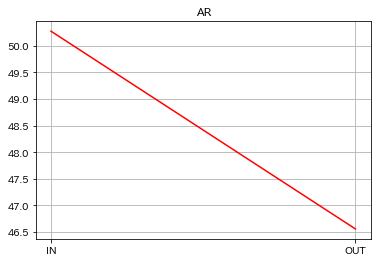

In [ ]:
#　データにモデルの予測値を追加

predict = gbm.predict(train_data)
train_df["p"] = predict

#AR値の計算
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(train_df['y_flg'],train_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_in = ar

print('【勾配ブースティングモデルAR値】')

print('モデル作成データ：',ar)

#予測確率の計算（モデル検証データ)
predict = gbm.predict(eval_data)
test_df['p']=predict

#AR値の計算
auc = roc_auc_score(test_df['y_flg'],test_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_out = ar

print('モデル検証データ：',ar)


import matplotlib.pyplot as plt

#グラフ作成自動化
list6 = []

y = [ar_in,ar_out]
x =  ['IN','OUT']

df6 = [y,x]

#グラフ作成
list6.append(df6)

fig,ax1=plt.subplots()
ax1.plot(df6[1],df6[0],color="red",label='AR値')

#タイトルの表示
plt.title('AR')
plt.grid()
plt.show()


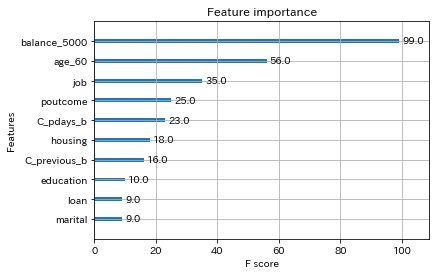

In [ ]:
#決定木の分岐に何回登場したか
import matplotlib.pyplot as plt
xgb.plot_importance(gbm)
plt.show()

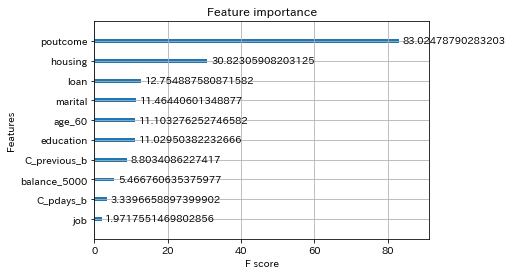

In [ ]:
#目的変数(予測したい値)への寄与度（モデルに影響を与える変数を見たいとき）
import matplotlib.pyplot as plt

xgb.plot_importance(gbm, importance_type = "gain")
plt.show()

<ipython-input-19-576e9994036e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['ID'] = i+1
<ipython-input-19-576e9994036e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['ID'] = i+1
<ipython-input-19-576e9994036e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

   ID    件数  契約数         率
0   1  2261  962  0.425475
1   2  2261  362  0.160106
2   3  2261  281  0.124281
3   4  2261  236  0.104379
4   5  2261  139  0.061477
5   6  2261  145  0.064131
6   7  2261  140  0.061920
7   8  2261  128  0.056612
8   9  2261  131  0.057939
9  10  2257   93  0.041205
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


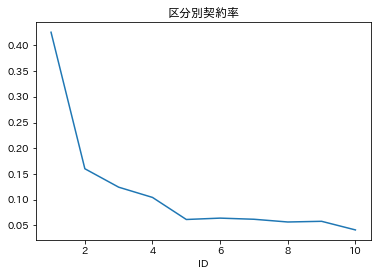

In [ ]:
# DataAを読み込む
data = test_df

# 項目pで降順に並び替える
data_sorted = data.sort_values('p', ascending=False)

# データを10等分する
num_rows = len(data_sorted)
chunk_size = num_rows // 10 + 1
chunks = [data_sorted[i:i+chunk_size] for i in range(0, num_rows, chunk_size)]

# 各チャンクにIDをつける
for i, chunk in enumerate(chunks):
    chunk['ID'] = i+1

# チャンクを結合する
result = pd.concat(chunks)

# 項目ID別の件数をカウントする
count_by_id = result.groupby('ID').size().reset_index(name='件数')

# 項目Xの合計値を計算する
sum_x_by_id = result.groupby('ID')['y_flg'].sum().reset_index(name='契約数')

# 項目ID別の件数と項目Xの合計値を結合する
result2 = pd.merge(count_by_id, sum_x_by_id, on='ID')
result2['率'] = result2['契約数']/result2['件数']

# 結果を出力する
print(result2)

import matplotlib.pyplot as plt

#matplotlibの日本語設定
!pip install japanize-matplotlib
import japanize_matplotlib


# データAの項目Xの値をリストで定義する
data_a_x = result2['ID']

# データAの項目Xに対応する値をリストで定義する
data_a_y = result2['率']

# グラフを描画する
fig, ax = plt.subplots()

# 折れ線グラフをaxに描画する
ax.plot(data_a_x, data_a_y, label='契約率')

# グラフのタイトルを設定する
ax.set_title('区分別契約率')

# x軸のラベルを設定する
ax.set_xlabel('ID')

# グラフを表示する
plt.show()


# モデルデモ用＿ニューラルネットワーク

In [ ]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#データ読込
df = pd.read_csv('https://raw.githubusercontent.com/PortugalJip2022/Portugal2022/main/bank-full.csv',delimiter=";")

#yのフラグを追加
df['y_flg']=df['y'].apply(lambda x : 1 if x == 'yes' else 0)

#変数加工

#連続値範囲指定
df['age_60'] = np.fmin(60,df['age'])
df['balance_5000'] = np.fmax(-1,df['balance'])
df['balance_5000'] = np.fmin(5000,df['balance_5000'])

#カテゴリまとめ作業
df['C_previous_b'] = df['previous'].apply(lambda x : x if x in (0,1,2) else 3)
df['C_pdays_b'] = pd.cut(x=df['pdays'], bins=[-999,-1,60,90,120,999],labels=False)

# 必須パッケージ
import glob
import pandas as pd
import numpy as np

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neural_network import MLPClassifier

#変数をカテゴリ変数化
cols = ["job", "marital", "education", "housing", "loan", "poutcome", "C_previous_b","C_pdays_b"]
#ce_df = ce.OrdinalEncoder(cols=cols, handle_unknown='impute')
# ↑xgbモデルの場合はこれで問題なし（ダミー変数変換したものと同じ結果出力）
ce_df = ce.OneHotEncoder(cols=cols, handle_unknown='impute')  #ダミー変数

df = ce_df.fit_transform(df)

df = df.drop("y", axis=1)
df = df.drop("age", axis=1)
df = df.drop("default", axis=1)
df = df.drop("balance", axis=1)
df = df.drop("contact", axis=1)
df = df.drop("day", axis=1)
df = df.drop("month", axis=1)
df = df.drop("duration", axis=1)
df = df.drop("campaign", axis=1)
df = df.drop("pdays", axis=1)
df = df.drop("previous", axis=1)

df.dtypes

job_1             int64
job_2             int64
job_3             int64
job_4             int64
job_5             int64
job_6             int64
job_7             int64
job_8             int64
job_9             int64
job_10            int64
job_11            int64
job_12            int64
marital_1         int64
marital_2         int64
marital_3         int64
education_1       int64
education_2       int64
education_3       int64
education_4       int64
housing_1         int64
housing_2         int64
loan_1            int64
loan_2            int64
poutcome_1        int64
poutcome_2        int64
poutcome_3        int64
poutcome_4        int64
y_flg             int64
age_60            int64
balance_5000      int64
C_previous_b_1    int64
C_previous_b_2    int64
C_previous_b_3    int64
C_previous_b_4    int64
C_pdays_b_1       int64
C_pdays_b_2       int64
C_pdays_b_3       int64
C_pdays_b_4       int64
C_pdays_b_5       int64
dtype: object

In [ ]:

#サンプリング（モデル作成データ、モデル検証データ作成）
train_df, test_df = train_test_split(df, test_size=0.5, random_state=3)

print(train_df.index.size)
print(test_df.index.size)

col = "y_flg"
train_y = train_df[col]
train_x = train_df.drop(col, axis=1)

val_y = test_df[col]
val_x = test_df.drop(col, axis=1)

clf = MLPClassifier(max_iter=10000)
clf.fit(train_x, train_y)


22605
22606


MLPClassifier(max_iter=10000)

In [ ]:
predict_proba = clf.predict_proba(train_x)
#print(predict_proba)
b = predict_proba[:, 1:3]
#print(b)
train_df["p"] = b

#AR値の計算
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(train_df['y_flg'],train_df['p'])
ar = 2 * (auc - 0.5) * 100

print('【ニューラルネットワークモデルAR値】')

print('モデル作成データ：',ar)

predict_proba = clf.predict_proba(val_x)
b = predict_proba[:, 1:3]
#予測確率の計算（モデル検証データ)
test_df['p']=b

#AR値の計算
auc = roc_auc_score(test_df['y_flg'],test_df['p'])
ar = 2 * (auc - 0.5) * 100

print('モデル検証データ：',ar)




【ニューラルネットワークモデルAR値】
モデル作成データ： 27.123368899586065
モデル検証データ： 26.74101630944783
